In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws'],
      dtype='object')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age_company,python_jb,spark,excel,r_lang,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,19.0,Tecolote Research\n,NM,0,50,1,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,24.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,5.0,KnowBe4\n,FL,1,13,1,1,1,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,20.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,28.5,Affinity Solutions\n,NY,1,25,1,0,1,0,0


In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
#FIX state los angeles

df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 MI               6
 KY               6
 DE               6
 IA               5
 CT               5
 LA               4
 OR               4
 NE               4
 KS               3
 NM               3
 ID               2
 MN               2
 Los Angeles      1
 SC               1
 RI               1
Name: job_state, dtype: int64

In [11]:
df['job_state'] = df['job_state'].apply(lambda x:x.strip() if x.strip().lower()!= 'los angeles' else 'CA')

In [12]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
MI      6
DE      6
GA      6
KY      6
CT      5
IA      5
LA      4
NE      4
OR      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [13]:
df['desc_length'] = df['Job Description'].apply(lambda x:len(x))

In [14]:
#competitor count
df['no_of_Competitors'] = df['Competitors'].apply(lambda x:len(x.split(',')) if x !=-1 else 0)

In [15]:
df['no_of_Competitors'].value_counts()

1    472
3    228
2     41
4      1
Name: no_of_Competitors, dtype: int64

In [16]:
#hourly wage to annanal wage

df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)

In [25]:
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [26]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [27]:
#remove new line char in job title

df['company_txt'] = df['company_txt'].apply(lambda x:x.replace('\n',''))

In [28]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [29]:
df.describe()

,Rating,Founded,hourly,Employer Provided,min_salary,max_salary,avg_salary,same_state,age_company,python_jb,spark,excel,r_lang,aws,desc_length,no_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,26.557278,0.557951,49.389488,0.528302,0.225067,0.522911,0.002695,0.237197,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,9.913037,0.496965,53.962906,0.499535,0.417908,0.499812,0.051882,0.425651,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,0.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,20.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,26.500000,1.000000,27.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,32.500000,1.000000,62.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,71.500000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority',
       'desc_length', 'no_of_Competitors'],
      dtype='object')

<AxesSubplot:>

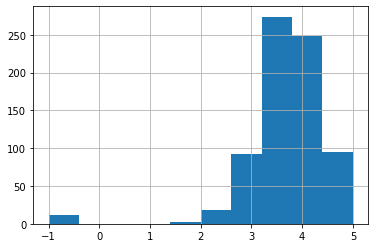

In [32]:
df.Rating.hist()
#pretty close to normal dist

<AxesSubplot:>

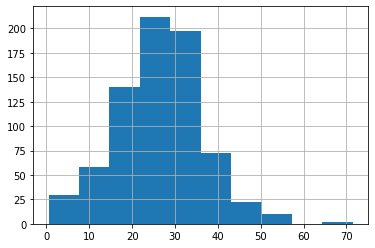

In [33]:
df.avg_salary.hist()
#pretty close to normal dist

<AxesSubplot:>

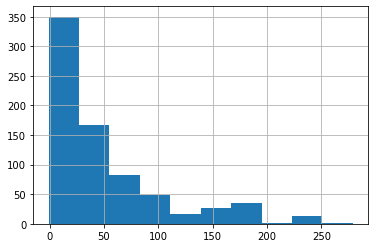

In [34]:
df.age_company.hist()
#exp distribution

<AxesSubplot:>

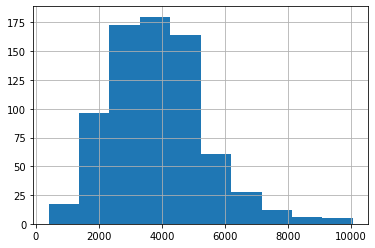

In [35]:
df.desc_length.hist()
#pretty close to normal dist

<AxesSubplot:>

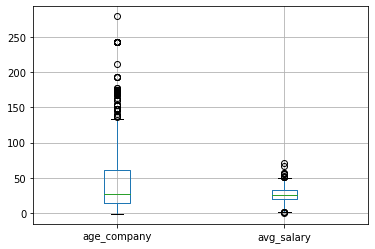

In [41]:
df.boxplot(column = ['age_company','avg_salary'])

<AxesSubplot:>

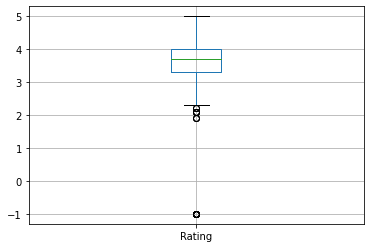

In [40]:
df.boxplot(column = ['Rating'])

In [43]:
df[['age_company','avg_salary','Rating','desc_length']].corr()

,age_company,avg_salary,Rating,desc_length
age_company,1.000000,0.072302,0.026164,0.164730
avg_salary,0.072302,1.000000,0.078041,0.084936
Rating,0.026164,0.078041,1.000000,-0.012281
desc_length,0.164730,0.084936,-0.012281,1.000000


<AxesSubplot:>

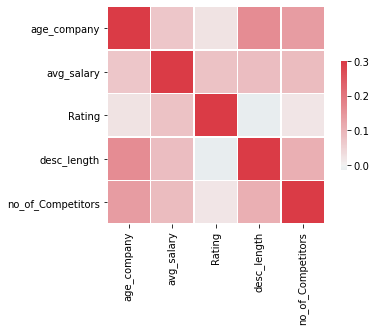

In [45]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age_company','avg_salary','Rating','desc_length','no_of_Competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
#categorical variables
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority',
       'desc_length', 'no_of_Competitors'],
      dtype='object')

In [47]:
df_catg = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt','job_state'
   ,'same_state','python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority']]

In [ ]:
for i in df_catg.columns:
    sns.bar